* To use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change.

* The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

* The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

* Also, to compare how conventional neural networks compare to convolutional neural network

# Classification Models with Keras

**Import Keras and Package**

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6
#!pip install matplotlib==3.5.0

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [6]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [4]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

Let's visualize the first image in the training set using Matplotlib's scripting layer.

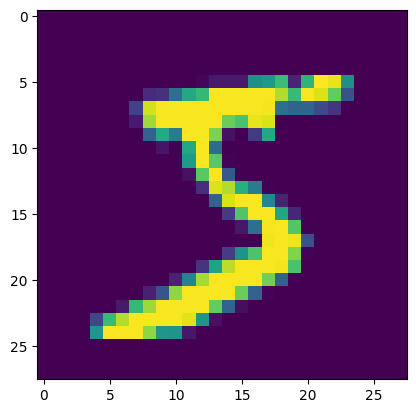

In [7]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [8]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Build a Neural Network

In [11]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Test the Network

In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9444 - loss: 0.1845 - val_accuracy: 0.9725 - val_loss: 0.0847
Epoch 2/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9752 - loss: 0.0788 - val_accuracy: 0.9772 - val_loss: 0.0742
Epoch 3/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9824 - loss: 0.0536 - val_accuracy: 0.9779 - val_loss: 0.0765
Epoch 4/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9871 - loss: 0.0396 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9822 - val_loss: 0.0695
Epoch 6/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.9801 - val_loss: 0.0882
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9775 - val_loss: 0.0841
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9787 - val_loss: 0.0883
Epoch 9/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9949 - loss: 0.0161 - val_a

Let's print the accuracy and the corresponding error.

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.98089998960495% 
 Error: 0.01910001039505005


Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.

Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

In [14]:
model.save('classification_model.h5')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.







When you are ready to use your model again, you use the load_model function from keras.models.

In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')